In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

insurance_data = pd.read_csv('/content/Insurance Dataset.csv')
insurance_data

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [3]:
insurance_data.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [4]:
insurance_data.tail()

,Age,Premium
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [5]:
insurance_data.isna().sum()

Age        0
Premium    0
dtype: int64

In [6]:
x = insurance_data.iloc[:,:-1].values
y = insurance_data.iloc[:,-1].values
x

array([[18],
       [22],
       [23],
       [26],
       [28],
       [31],
       [33]])

In [7]:
x.ndim

2

Text(0.5, 1.0, 'Exp vs salary')

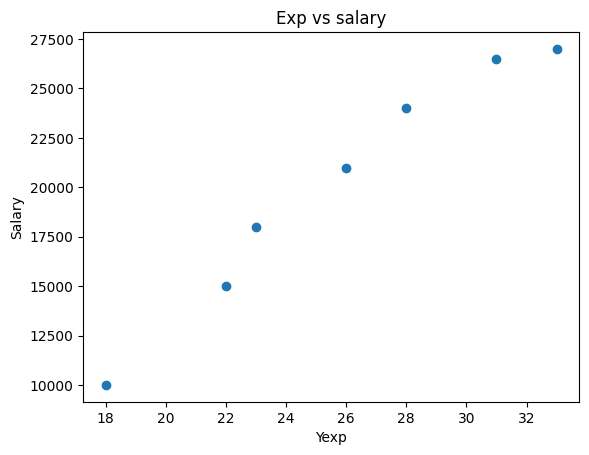

In [8]:
plt.scatter(x,y)
plt.xlabel('Yexp')
plt.ylabel("Salary")
plt.title('Exp vs salary')

In [9]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [10]:
x_train

array([[23],
       [28],
       [26],
       [33]])

In [11]:
x_test

array([[18],
       [22],
       [31]])

In [12]:
y_train

array([18000, 24000, 21000, 27000])

In [13]:
y_test

array([10000, 15000, 26500])

model creation

In [14]:
from sklearn.linear_model import LinearRegression
# Create Object(model)
model = LinearRegression()
# fit model
model.fit(x_train, y_train)
# Predict value
y_pred = model.predict(x_test)
y_pred

array([13896.22641509, 17518.86792453, 25669.81132075])

In [15]:
y_test

array([10000, 15000, 26500])

In [16]:
print(model.predict([[3.9]]))

[1126.41509434]


Text(0, 0.5, 'y_train')

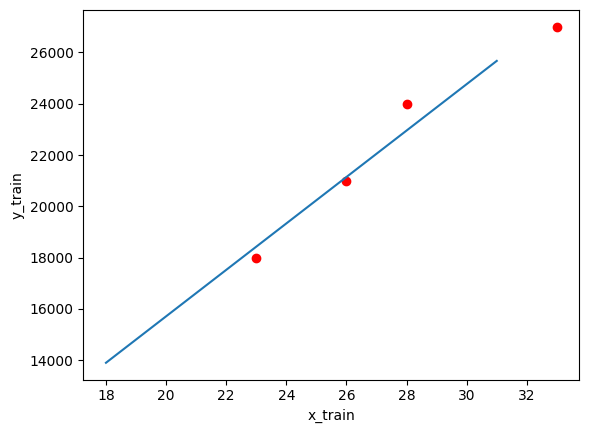

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, y_pred) # Best fit line
plt.xlabel("x_train")
plt.ylabel("y_train")

In [18]:
print('slope or coefficient is', model.coef_)  # coef_
print("constant is ", model.intercept_)

slope or coefficient is [905.66037736]
constant is  -2405.6603773584866


In [19]:
df = pd.DataFrame({'Actual_value':y_test, 'Predicted_value':y_pred, 'Difference': y_test - y_pred})
df

,Actual_value,Predicted_value,Difference
0,10000,13896.226415,-3896.226415
1,15000,17518.867925,-2518.867925
2,26500,25669.811321,830.188679


In [20]:
from sklearn.metrics import mean_absolute_error
print("MAE is", mean_absolute_error(y_test, y_pred))

MAE is 2415.0943396226417
